<h2>Logistic Regression

In [354]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score,  f1_score, r2_score, confusion_matrix, roc_curve, roc_auc_score, recall_score, mean_squared_error, r2_score)
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.svm import SVR, SVC
from sklearn.model_selection import learning_curve
import seaborn as sns



**Firstly we convert the CSV Files into pandas Dataframes**

In [410]:
df = pd.read_csv('/Users/ahmed/Desktop/Files_Data_Science/df.csv')
df_imputed = pd.read_csv('/Users/ahmed/Desktop/Files_Data_Science/df_imputed.csv')
df_knn = pd.read_csv('/Users/ahmed/Desktop/Files_Data_Science/knn.csv')
df_iterative = pd.read_csv('/Users/ahmed/Desktop/Files_Data_Science/Iterative.csv')
df_mean = pd.read_csv('/Users/ahmed/Desktop/Files_Data_Science/mean.csv')
df_median = pd.read_csv('/Users/ahmed/Desktop/Files_Data_Science/median.csv')
df_mode = pd.read_csv('/Users/ahmed/Desktop/Files_Data_Science/mode.csv')

df = df.dropna()

<h3>Unimputed Dataset

**Creating target and feature variables**

In [178]:
X = df.drop(columns='class')
y = df['class']



**Data encoding**

In [179]:
label_encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object':
        X[col + '_enc'] = label_encoder.fit_transform(X[col])
        X.drop(columns = col, inplace= True)

In [237]:
label_encoder = LabelEncoder()

#y = label_encoder.fit_transform(y.values)

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

**Split the data into train and test set**

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)


In [362]:
logreg = LogisticRegression(max_iter= 10000)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

y_pred_train = logreg.predict(X_train)

acc = accuracy_score(y_pred= y_pred, y_true= y_test)

acc_train = accuracy_score(y_pred= y_pred_train, y_true= y_train)

f1 = f1_score(y_pred=y_pred, y_true= y_test)

r2 = r2_score(y_pred = y_pred, y_true = y_test)

print(acc, acc_train)
#We also look for correlation using the correlation matrix

corr_mat = X.corr()




0.9857142857142858 0.978494623655914


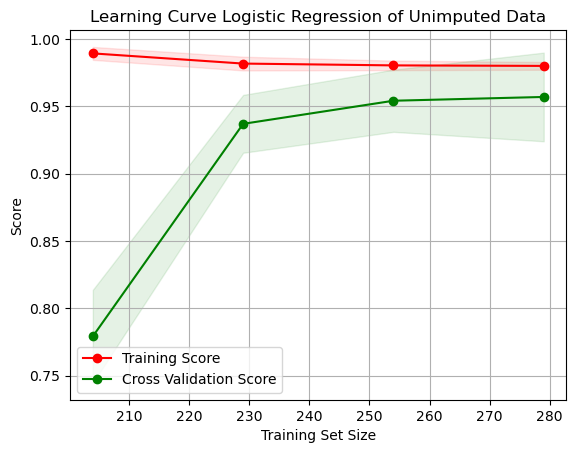

In [370]:
train_sizes = np.linspace(0.2, 1.0, 10)

train_sizes_abs, train_scores, test_scores = learning_curve(logreg, X, y, train_sizes=train_sizes, cv=5, random_state= 42)

train_scores_std = np.std(train_scores, axis = 1)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis = 1)
test_scores_std = np.std(test_scores, axis = 1)

plt.figure()
plt.title('Learning Curve Logistic Regression of Unimputed Data')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.grid()
plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha = 0.1, color = 'r')
plt.fill_between(train_sizes_abs, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha = 0.1, color = 'g')
plt.plot(train_sizes_abs, train_scores_mean, '-o', color = 'r', label = 'Training Score')
plt.plot(train_sizes_abs, test_scores_mean, '-o', color = 'g', label = 'Cross Validation Score')
plt.legend(loc = 'best')
plt.show()

**Plotting the Correlation Matrix**

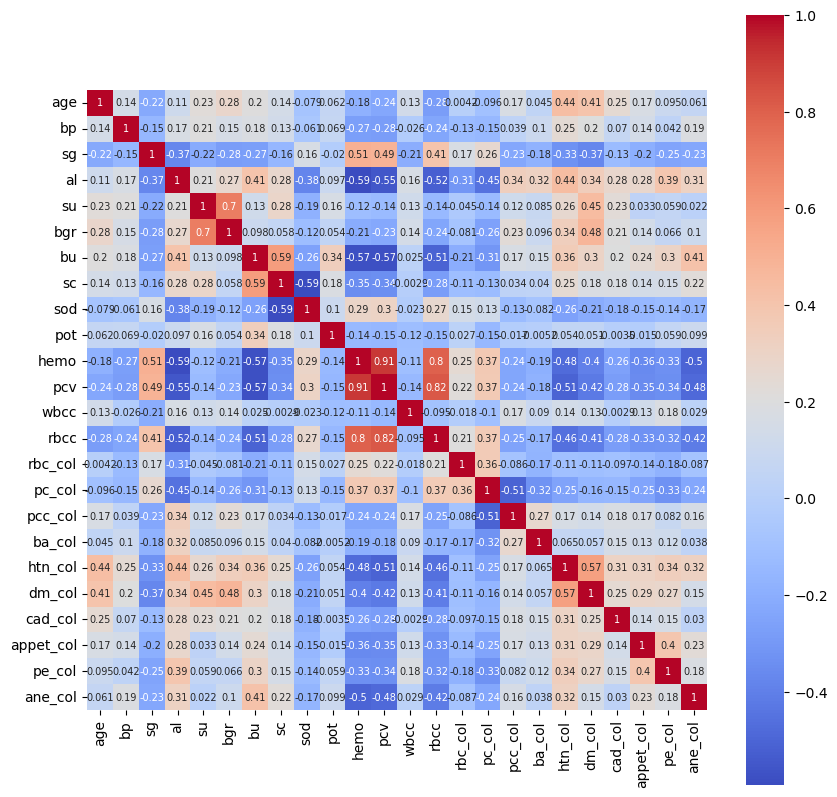

In [240]:
plt.figure(figsize= (10,10))
sns.heatmap(corr_mat, annot= True, annot_kws= {'size': 7}, cmap= 'coolwarm', square= True)
plt.show()


**Predictive power of the different Features**

In [241]:
coefficients = logreg.coef_[0]

coeff_df = pd.DataFrame({'Feature': X.columns, 'Coefficients': coefficients})

coeff_df['Absolute Value'] = abs(coeff_df['Coefficients'])

coeff_df = coeff_df.sort_values(by = 'Absolute Value', ascending= False)

coeff_df

,Feature,Coefficients,Absolute Value
7,sc,-1.768185,1.768185
3,al,-1.679021,1.679021
22,pe_col,-1.308127,1.308127
18,htn_col,-1.297686,1.297686
19,dm_col,-1.151728,1.151728
4,su,-1.020658,1.020658
10,hemo,0.906750,0.906750
21,appet_col,-0.871464,0.871464
23,ane_col,-0.502592,0.502592
15,pc_col,0.431111,0.431111


<h3> Imputed Dataset

**First create feature and target variables**

In [248]:
X_imp = df_imputed.drop(columns= 'class')
y_imp = df_imputed['class']

**Encode the Data**

In [250]:
for col in X_imp.columns:
    if X_imp[col].dtype == 'object':
        X_imp[col + '_col'] = label_encoder.fit_transform(X_imp[col])
        X_imp.drop(columns= col, inplace= True)

y_imp = label_encoder.fit_transform(y_imp)

y_imp

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

**Splitting the data**

In [251]:
X_imp_train, X_imp_test, y_imp_train, y_imp_test = train_test_split(X_imp, y_imp, test_size= 0.2, random_state= 42)

In [253]:
logreg = LogisticRegression(max_iter=1000)

logreg.fit(X_imp_train, y_imp_train)

y_imp_pred = logreg.predict(X_imp_test)

acc = accuracy_score(y_pred=y_imp_pred, y_true=y_imp_test)

f1 = f1_score(y_pred=y_imp_pred, y_true= y_imp_test)

r2 = r2_score(y_pred=y_imp_pred, y_true= y_imp_test)

corr_mat = X_imp.corr()

cm = confusion_matrix(y_pred=y_imp_pred, y_true = y_imp_test)

acc


0.9857142857142858

<Axes: >

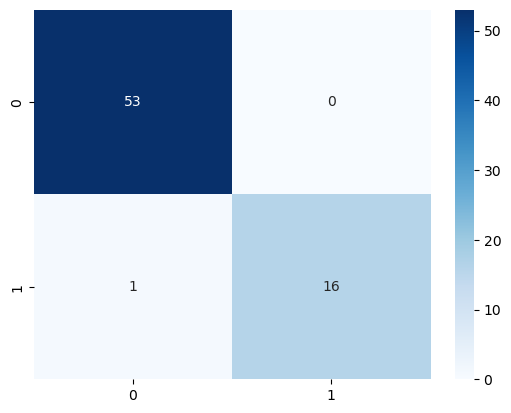

In [427]:
sns.heatmap(cm, cmap = 'Blues', annot = True)

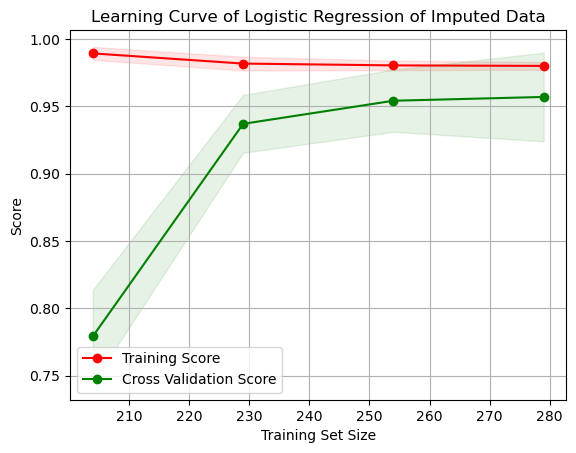

In [369]:
train_sizes = np.linspace(0.2, 1.0, 10)

train_sizes_abs, train_scores, test_scores = learning_curve(logreg, X_imp, y_imp, train_sizes=train_sizes, cv=5, random_state= 42)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis = 1)
test_scores_mean = np.mean(test_scores, axis = 1)
test_scores_std = np.std(test_scores, axis = 1)

plt.figure()
plt.title('Learning Curve of Logistic Regression of Imputed Data')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.grid()
plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha = 0.1, color = 'r')
plt.fill_between(train_sizes_abs, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha = 0.1, color = 'g')
plt.plot(train_sizes_abs, train_scores_mean, '-o', color = 'r', label = 'Training Score')
plt.plot(train_sizes_abs, test_scores_mean, '-o', color = 'g', label = 'Cross Validation Score')
plt.legend(loc = 'best')
plt.show()

<Axes: >

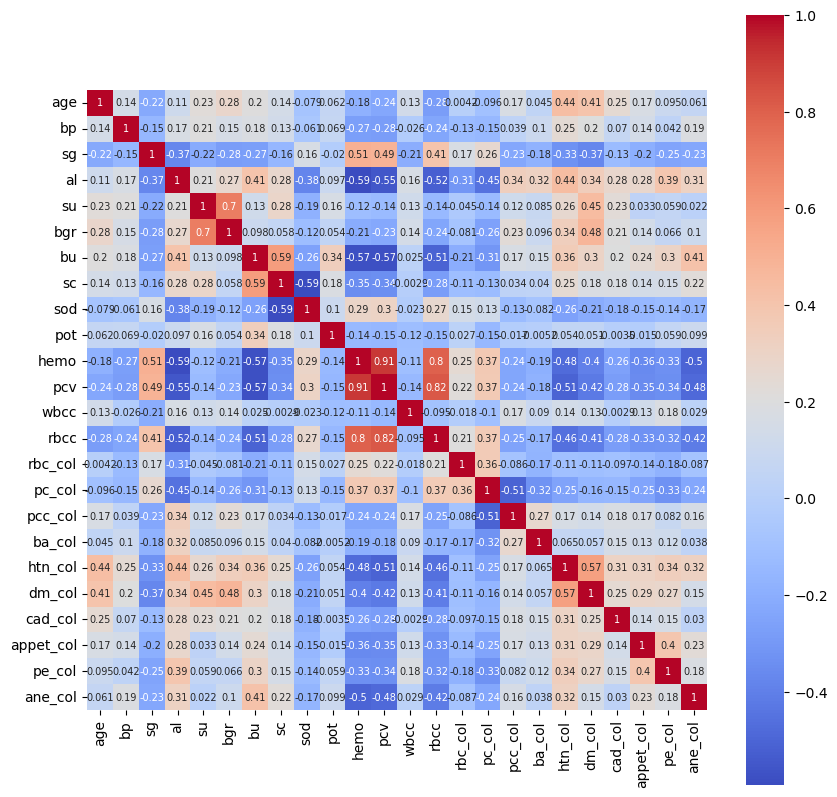

In [254]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_mat, annot= True, annot_kws= {'size': 7}, cmap= 'coolwarm', square= True)

In [469]:
coefficients = logreg.coef_[0]

coeff_df = pd.DataFrame({'Features': X_imp.columns, 'Coefficients': coefficients})

coeff_df['Absolute Value'] = abs(coeff_df['Coefficients'])

coeff_df = coeff_df.sort_values(by= 'Absolute Value', ascending= False)

coeff_df

,Features,Coefficients,Absolute Value
11,pcv,1.916152,1.916152
3,al,1.606635,1.606635
17,ba_col,-1.013526,1.013526
19,dm_col,0.863604,0.863604
14,rbc_col,-0.790742,0.790742
18,htn_col,0.649919,0.649919
22,pe_col,0.637915,0.637915
21,appet_col,-0.564042,0.564042
23,ane_col,0.397727,0.397727
6,bu,-0.389536,0.389536


<h3>KNN Imputation

In [413]:
X_knn = df_knn.drop(columns= 'class')
y_knn = df_knn['class']

In [416]:
'''
label_encoder = LabelEncoder()

for col in X.columns:
    if X_knn[col].dtype == 'object':
        X_knn[col + '_enc'] = label_encoder.fit_transform(X_knn[col])
        X_knn.drop(columns = col, inplace= True)
'''

"\nlabel_encoder = LabelEncoder()\n\nfor col in X.columns:\n    if X_knn[col].dtype == 'object':\n        X_knn[col + '_enc'] = label_encoder.fit_transform(X_knn[col])\n        X_knn.drop(columns = col, inplace= True)\n"

In [414]:
y_knn = label_encoder.fit_transform(y_knn)

In [432]:
X_knn_train, X_knn_test, y_knn_train, y_knn_test = train_test_split(X_knn, y_knn, random_state= 42, test_size=0.2)

In [433]:
logreg.fit(X_knn_train, y_knn_train)

y_knn_pred = logreg.predict(X_knn_test)

acc = accuracy_score(y_pred=y_knn_pred, y_true=y_knn_test)

f1 = f1_score(y_pred=y_knn_pred, y_true= y_knn_test)

r2 = r2_score(y_pred=y_knn_pred, y_true= y_knn_test)

cm_knn = confusion_matrix(y_knn_test, y_knn_pred)

<Axes: >

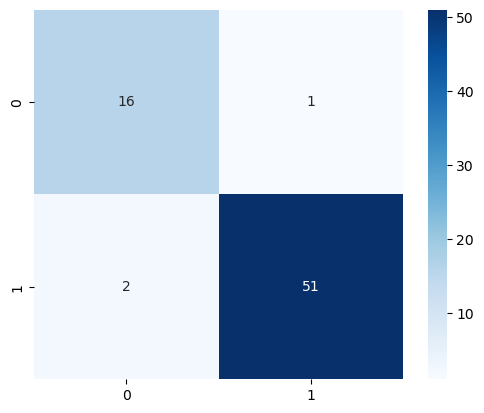

In [434]:
plt.figure()
sns.heatmap(cm_knn, annot= True, square = True, cmap= 'Blues')

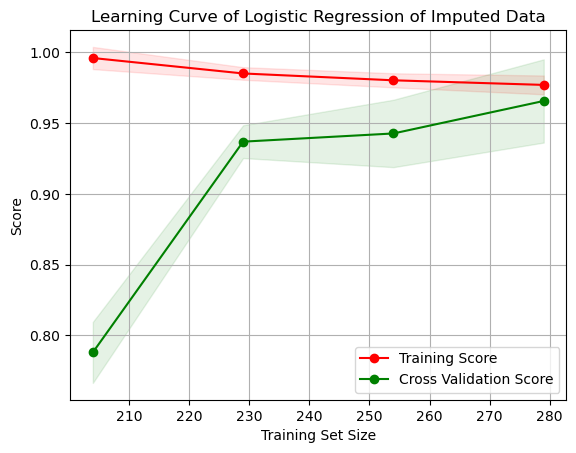

In [420]:
train_sizes = np.linspace(0.2, 1.0, 10)

train_sizes_abs, train_scores, test_scores = learning_curve(logreg, X_knn, y_knn, train_sizes=train_sizes, cv=5, random_state= 42)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis = 1)
test_scores_mean = np.mean(test_scores, axis = 1)
test_scores_std = np.std(test_scores, axis = 1)

plt.figure()
plt.title('Learning Curve of Logistic Regression of Imputed Data')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.grid()
plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha = 0.1, color = 'r')
plt.fill_between(train_sizes_abs, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha = 0.1, color = 'g')
plt.plot(train_sizes_abs, train_scores_mean, '-o', color = 'r', label = 'Training Score')
plt.plot(train_sizes_abs, test_scores_mean, '-o', color = 'g', label = 'Cross Validation Score')
plt.legend(loc = 'best')
plt.show()

<h3> Iterative Imputation

In [421]:
X_iter = df_iterative.drop(columns= 'class')
y_iter = df_iterative['class']

In [423]:
X_iter_train, X_iter_test, y_iter_train, y_iter_test = train_test_split(X_iter, y_iter, test_size= 0.2, random_state= 42)

In [436]:
logreg.fit(X_iter_train, y_iter_train)

y_iter_pred = logreg.predict(X_iter_test)

acc = accuracy_score(y_pred=y_iter_pred, y_true=y_iter_test)

f1 = f1_score(y_pred=y_iter_pred, y_true= y_iter_test)

r2 = r2_score(y_pred=y_iter_pred, y_true= y_iter_test)

cm_iter = confusion_matrix(y_iter_test, y_iter_pred)

<Axes: >

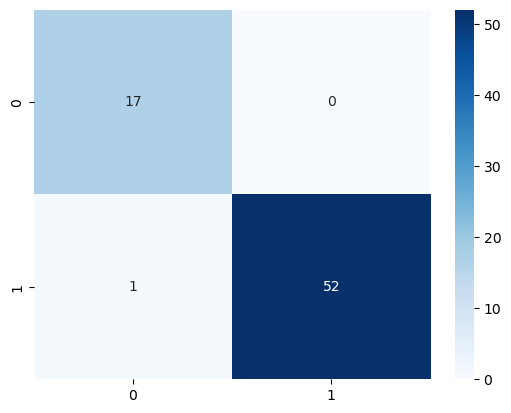

In [437]:
sns.heatmap(cm_iter, cmap= 'Blues', annot= True)

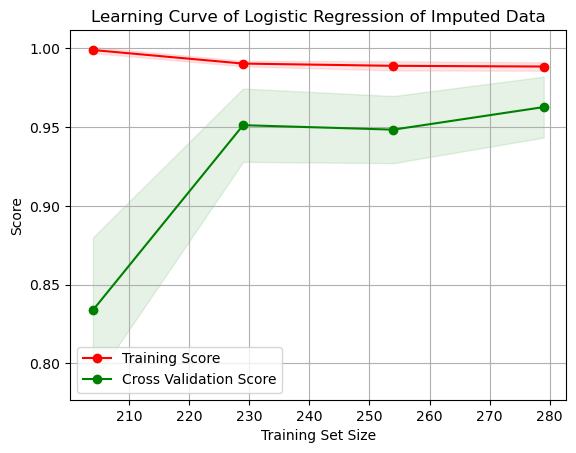

In [438]:
train_sizes = np.linspace(0.2, 1.0, 10)

train_sizes_abs, train_scores, test_scores = learning_curve(logreg, X_iter, y_iter, train_sizes=train_sizes, cv=5, random_state= 42)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis = 1)
test_scores_mean = np.mean(test_scores, axis = 1)
test_scores_std = np.std(test_scores, axis = 1)

plt.figure()
plt.title('Learning Curve of Logistic Regression of Imputed Data')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.grid()
plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha = 0.1, color = 'r')
plt.fill_between(train_sizes_abs, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha = 0.1, color = 'g')
plt.plot(train_sizes_abs, train_scores_mean, '-o', color = 'r', label = 'Training Score')
plt.plot(train_sizes_abs, test_scores_mean, '-o', color = 'g', label = 'Cross Validation Score')
plt.legend(loc = 'best')
plt.show()

<h3>Mean Imputation

In [446]:
X_mean = df_mean.drop(columns= 'class')
y_mean = df_mean['class']

In [447]:
X_mean_train, X_mean_test, y_mean_train, y_mean_test = train_test_split(X_mean, y_mean, test_size= 0.2, random_state= 42)

In [450]:
logreg.fit(X_mean_train, y_mean_train)

y_mean_pred = logreg.predict(X_mean_test)

acc = accuracy_score(y_pred=y_mean_pred, y_true=y_mean_test)

f1 = f1_score(y_pred=y_mean_pred, y_true= y_mean_test)

r2 = r2_score(y_pred=y_mean_pred, y_true= y_mean_test)

cm_mean = confusion_matrix(y_mean_test, y_mean_pred)

<Axes: >

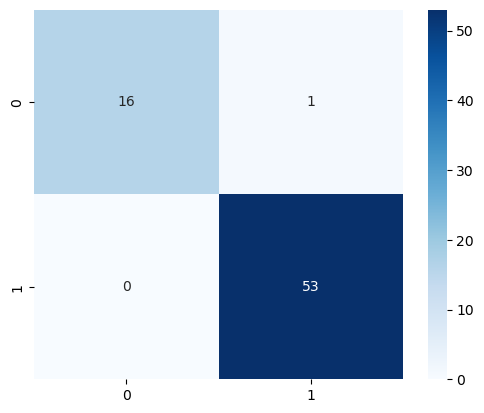

In [452]:
sns.heatmap(cm_mean, annot= True, square = True, cmap = 'Blues')

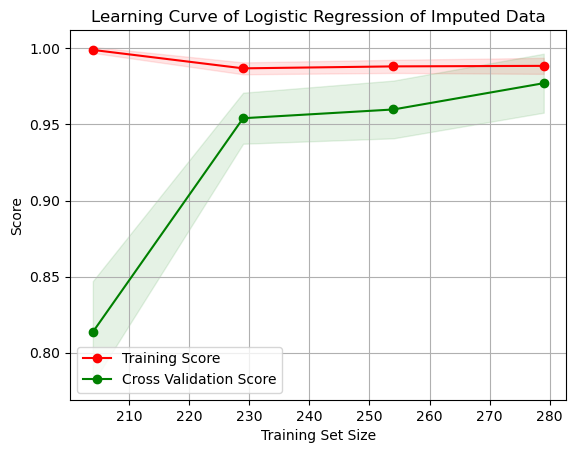

In [458]:
train_sizes = np.linspace(0.2, 1.0, 10)

train_sizes_abs, train_scores, test_scores = learning_curve(logreg, X_mean, y_mean, train_sizes=train_sizes, cv=5, random_state= 42)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis = 1)
test_scores_mean = np.mean(test_scores, axis = 1)
test_scores_std = np.std(test_scores, axis = 1)

plt.figure()
plt.title('Learning Curve of Logistic Regression of Imputed Data')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.grid()
plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha = 0.1, color = 'r')
plt.fill_between(train_sizes_abs, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha = 0.1, color = 'g')
plt.plot(train_sizes_abs, train_scores_mean, '-o', color = 'r', label = 'Training Score')
plt.plot(train_sizes_abs, test_scores_mean, '-o', color = 'g', label = 'Cross Validation Score')
plt.legend(loc = 'best')
plt.show()

<h3>Median Imputation

In [453]:
X_median = df_median.drop(columns= 'class')
y_median = df_median['class']

In [454]:
X_median_train, X_median_test, y_median_train, y_median_test = train_test_split(X_median, y_median, test_size= 0.2, random_state= 42)

In [455]:
logreg.fit(X_median_train, y_median_train)

y_median_pred = logreg.predict(X_median_test)

acc = accuracy_score(y_pred=y_median_pred, y_true=y_median_test)

f1 = f1_score(y_pred=y_median_pred, y_true= y_median_test)

r2 = r2_score(y_pred=y_median_pred, y_true= y_median_test)

cm_median = confusion_matrix(y_median_test, y_median_pred)

<Axes: >

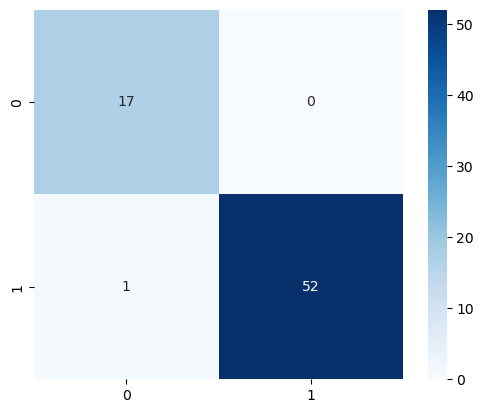

In [456]:
sns.heatmap(cm_median, cmap = 'Blues', annot = True, square= True)

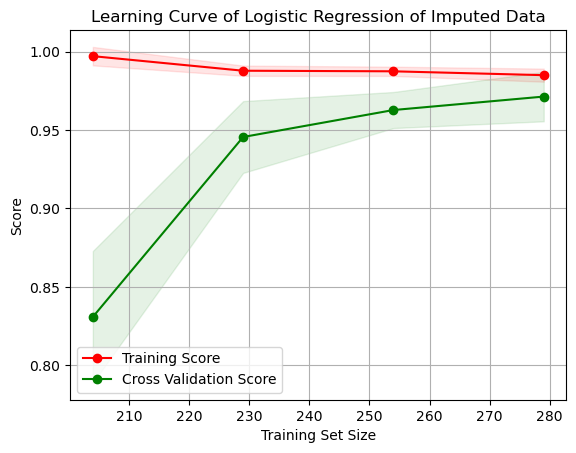

In [457]:
train_sizes = np.linspace(0.2, 1.0, 10)

train_sizes_abs, train_scores, test_scores = learning_curve(logreg, X_median, y_median, train_sizes=train_sizes, cv=5, random_state= 42)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis = 1)
test_scores_mean = np.mean(test_scores, axis = 1)
test_scores_std = np.std(test_scores, axis = 1)

plt.figure()
plt.title('Learning Curve of Logistic Regression of Imputed Data')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.grid()
plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha = 0.1, color = 'r')
plt.fill_between(train_sizes_abs, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha = 0.1, color = 'g')
plt.plot(train_sizes_abs, train_scores_mean, '-o', color = 'r', label = 'Training Score')
plt.plot(train_sizes_abs, test_scores_mean, '-o', color = 'g', label = 'Cross Validation Score')
plt.legend(loc = 'best')
plt.show()

<h3>Mode Imputation

In [466]:
X_mode = df_mode.drop(columns= 'class')
y_mode = df_mode['class']

In [467]:
X_mode_train, X_mode_test, y_mode_train, y_mode_test = train_test_split(X_mode, y_mode, test_size= 0.2, random_state= 42)

In [470]:
logreg.fit(X_mode_train, y_mode_train)

y_mode_pred = logreg.predict(X_mode_test)

acc = accuracy_score(y_pred=y_mode_pred, y_true=y_mode_test)

f1 = f1_score(y_pred=y_mode_pred, y_true= y_mode_test)

r2 = r2_score(y_pred=y_mode_pred, y_true= y_mode_test)

cm_median = confusion_matrix(y_mode_test, y_mode_pred)

<h2>KNN

<h3>Unimputed Data

**Determining the optimal number of neighbors**

In [475]:
for k in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv= 5)
    print(f'k = {k}\t -> Mean Accuracy:\t {scores.mean():.4f}') 

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ahmed/anaconda3/envs/nom/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ahmed/anaconda3/envs/nom/lib/python3.10/site-packages/sklearn/neighbors/_classification.py", line 215, in fit
    return self._fit(X, y)
  File "/Users/ahmed/anaconda3/envs/nom/lib/python3.10/site-packages/sklearn/neighbors/_base.py", line 476, in _fit
    check_classification_targets(y)
  File "/Users/ahmed/anaconda3/envs/nom/lib/python3.10/site-packages/sklearn/utils/multiclass.py", line 218, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous-multioutput'


We see that k = 10 and k = 12 have the highest accuracy of the ones we tried so wee will use 12

In [462]:
knn = KNeighborsClassifier(n_neighbors= 12)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

acc_knn = accuracy_score(y_pred = y_pred,y_true = y_test)

print(acc_knn)

cm_knn = confusion_matrix(y_pred= y_pred, y_true= y_test)

acc_cm_knn = (cm_knn[0][0] + cm_knn[0][1])/(cm_knn[0][0] + cm_knn[0][1] + cm_knn[1][0] + cm_knn[1][1])

print(acc_cm_knn)



0.7285714285714285
0.7571428571428571


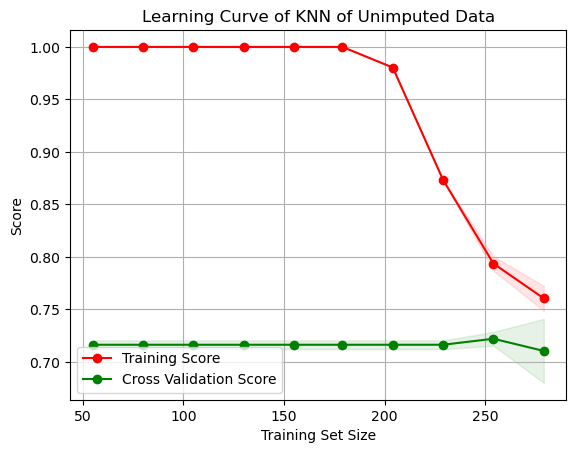

In [375]:
train_sizes = np.linspace(0.2, 1.0, 10)

train_sizes_abs, train_scores, test_scores = learning_curve(knn, X, y, train_sizes=train_sizes, cv=5, random_state= 42)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis = 1)
test_scores_mean = np.mean(test_scores, axis = 1)
test_scores_std = np.std(test_scores, axis = 1)

plt.figure()
plt.title('Learning Curve of KNN of Unimputed Data')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.grid()
plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha = 0.1, color = 'r')
plt.fill_between(train_sizes_abs, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha = 0.1, color = 'g')
plt.plot(train_sizes_abs, train_scores_mean, '-o', color = 'r', label = 'Training Score')
plt.plot(train_sizes_abs, test_scores_mean, '-o', color = 'g', label = 'Cross Validation Score')
plt.legend(loc = 'best')
plt.show()

Plotting the confusion matrix

<Axes: >

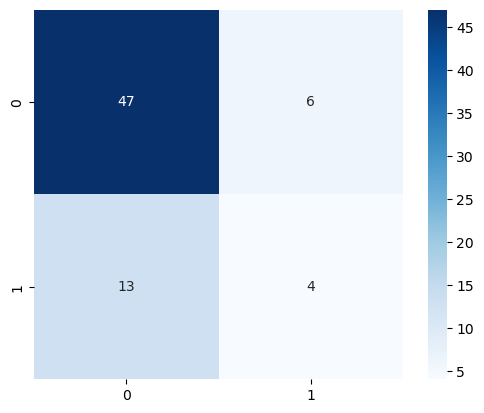

In [286]:
plt.figure()
sns.heatmap(cm_knn, annot= True, square= True, cmap= 'Blues') #why are the TP so low? it seems the accuracy is being carried by the TN

<h3>Imputed Data

**Again we must determine the optimal value of k neighbors**

In [296]:
for k in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_imp, y_imp, cv = 5)
    print(f'k = {k}\t -> Mean Accuracy\t {scores.mean(): .4f}')

k = 1	 -> Mean Accuracy	  0.6962
k = 2	 -> Mean Accuracy	  0.6906
k = 3	 -> Mean Accuracy	  0.6761
k = 4	 -> Mean Accuracy	  0.6877
k = 5	 -> Mean Accuracy	  0.6733
k = 6	 -> Mean Accuracy	  0.6762
k = 7	 -> Mean Accuracy	  0.6562
k = 8	 -> Mean Accuracy	  0.6790
k = 9	 -> Mean Accuracy	  0.6819
k = 10	 -> Mean Accuracy	  0.7105
k = 11	 -> Mean Accuracy	  0.6933
k = 12	 -> Mean Accuracy	  0.7105
k = 13	 -> Mean Accuracy	  0.7018
k = 14	 -> Mean Accuracy	  0.6990


Again k = 12 seems like the best choice (or k = 10 for that matter)

In [298]:
knn = KNeighborsClassifier(n_neighbors=12)

knn.fit(X_imp_train, y_imp_train)

y_pred = knn.predict(X_imp_test)

acc_imp_knn = accuracy_score(y_pred = y_pred, y_true= y_imp_test)

print(acc_imp_knn)

cm_imp_knn = confusion_matrix(y_pred = y_pred, y_true=y_imp_test)

acc_cm_imp_knn = (cm_imp_knn[0][0] + cm_imp_knn[0][1])/(cm_imp_knn[0][0] + cm_imp_knn[0][1] + cm_imp_knn[1][0] + cm_imp_knn[1][1])

print(acc_cm_knn)

0.7285714285714285
0.7571428571428571


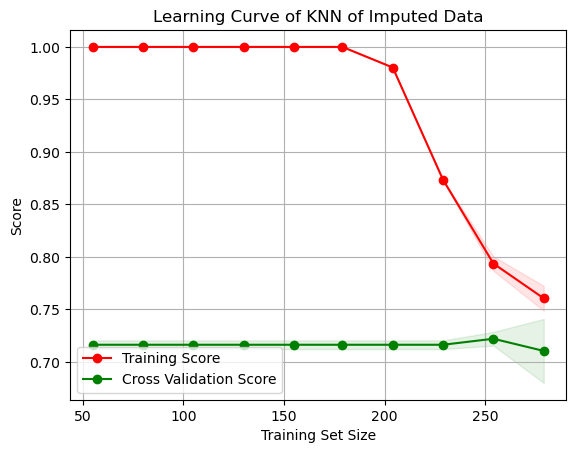

In [372]:
train_sizes = np.linspace(0.2, 1.0, 10)

train_sizes_abs, train_scores, test_scores = learning_curve(knn, X_imp, y_imp, train_sizes=train_sizes, cv=5, random_state= 42)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis = 1)
test_scores_mean = np.mean(test_scores, axis = 1)
test_scores_std = np.std(test_scores, axis = 1)

plt.figure()
plt.title('Learning Curve of KNN of Imputed Data')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.grid()
plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha = 0.1, color = 'r')
plt.fill_between(train_sizes_abs, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha = 0.1, color = 'g')
plt.plot(train_sizes_abs, train_scores_mean, '-o', color = 'r', label = 'Training Score')
plt.plot(train_sizes_abs, test_scores_mean, '-o', color = 'g', label = 'Cross Validation Score')
plt.legend(loc = 'best')
plt.show()

<Axes: >

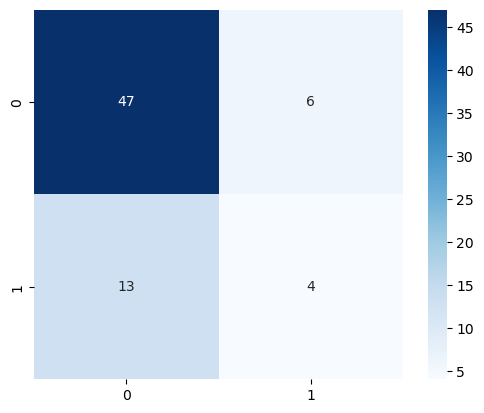

In [299]:
plt.figure()
sns.heatmap(cm_imp_knn, annot= True, cmap= 'Blues', square= 'True')

<h2>Support Vector Machines

<h3>Unimputed Data

In [378]:
svm = SVC()

svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

mse = mean_squared_error(y_pred=y_pred, y_true= y_test)

print(mse)

r2 = r2_score(y_pred=y_pred, y_true = y_test)

print(r2)

acc = accuracy_score(y_test, y_pred)

acc



0.24285714285714285
-0.320754716981132


0.7571428571428571

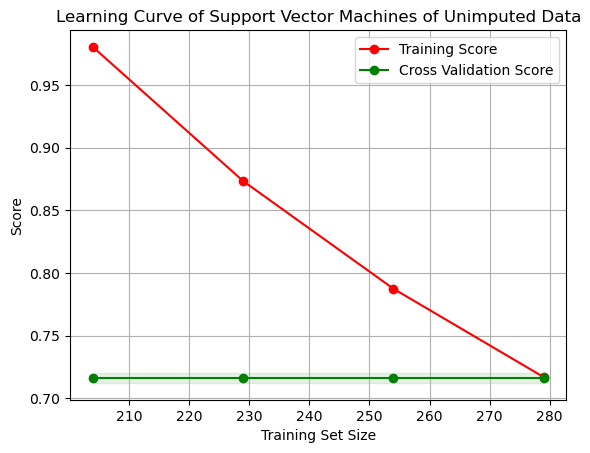

In [379]:
train_sizes = np.linspace(0.2, 1.0, 10)

train_sizes_abs, train_scores, test_scores = learning_curve(svm, X, y, train_sizes=train_sizes, cv=5, random_state= 42)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis = 1)
test_scores_mean = np.mean(test_scores, axis = 1)
test_scores_std = np.std(test_scores, axis = 1)

plt.figure()
plt.title('Learning Curve of Support Vector Machines of Unimputed Data')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.grid()
plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha = 0.1, color = 'r')
plt.fill_between(train_sizes_abs, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha = 0.1, color = 'g')
plt.plot(train_sizes_abs, train_scores_mean, '-o', color = 'r', label = 'Training Score')
plt.plot(train_sizes_abs, test_scores_mean, '-o', color = 'g', label = 'Cross Validation Score')
plt.legend(loc = 'best')
plt.show()

<h3>Imputed Data

In [310]:
svm.fit(X_imp_train, y_imp_train)

y_pred = svm.predict(X_imp_test)

mse = mean_squared_error(y_pred = y_pred, y_true= y_imp_test)

print(mse)

r2 = r2_score(y_pred=y_pred, y_true = y_imp_test)

print(r2)

0.24285714285714285
-0.320754716981132


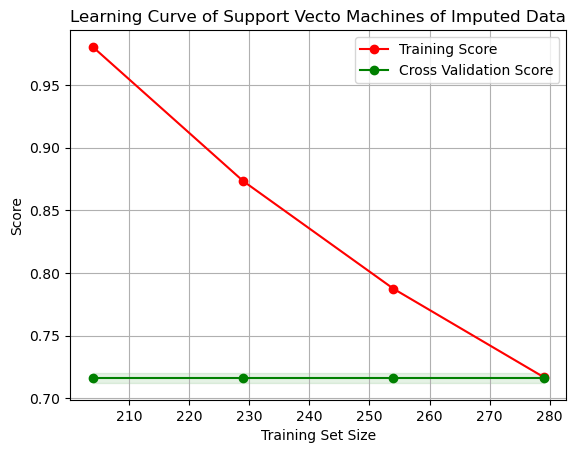

In [380]:
train_sizes = np.linspace(0.2, 1.0, 10)

train_sizes_abs, train_scores, test_scores = learning_curve(svm, X_imp, y_imp, train_sizes=train_sizes, cv=5, random_state= 42)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis = 1)
test_scores_mean = np.mean(test_scores, axis = 1)
test_scores_std = np.std(test_scores, axis = 1)

plt.figure()
plt.title('Learning Curve of Support Vecto Machines of Imputed Data')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.grid()
plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha = 0.1, color = 'r')
plt.fill_between(train_sizes_abs, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha = 0.1, color = 'g')
plt.plot(train_sizes_abs, train_scores_mean, '-o', color = 'r', label = 'Training Score')
plt.plot(train_sizes_abs, test_scores_mean, '-o', color = 'g', label = 'Cross Validation Score')
plt.legend(loc = 'best')
plt.show()

<h2>Gradient Boosting Machines

<h3>Unimputed Data

In [382]:
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier()

xgb_classifier.fit(X_train, y_train)

y_pred = xgb_classifier.predict(X_test)

y_pred_train = xgb_classifier.predict(X_train)

acc_xgb = accuracy_score(y_pred=y_pred, y_true=y_test)

acc_xgb_train = accuracy_score(y_pred = y_pred_train, y_true = y_train)

print(acc_xgb, acc_xgb_train)

cm_xgb = confusion_matrix(y_pred=y_pred, y_true=y_test)

print(cm_xgb[0][1])

acc_cm_xgb = (cm_xgb[0][0] + cm_xgb[1][1])/(cm_xgb[0][0] + cm_xgb[1][1] + cm_xgb[1][0] + cm_xgb[0][1])

print(acc_cm_xgb)




0.9857142857142858 1.0
0
0.9857142857142858


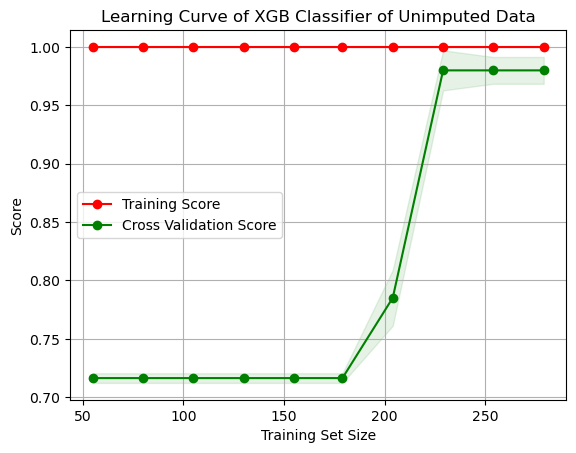

In [387]:
train_sizes = np.linspace(0.2, 1.0, 10)

train_sizes_abs, train_scores, test_scores = learning_curve(xgb_classifier, X, y, train_sizes=train_sizes, cv=5, random_state= 42)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis = 1)
test_scores_mean = np.mean(test_scores, axis = 1)
test_scores_std = np.std(test_scores, axis = 1)

plt.figure()
plt.title('Learning Curve of XGB Classifier of Unimputed Data')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.grid()
plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha = 0.1, color = 'r')
plt.fill_between(train_sizes_abs, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha = 0.1, color = 'g')
plt.plot(train_sizes_abs, train_scores_mean, '-o', color = 'r', label = 'Training Score')
plt.plot(train_sizes_abs, test_scores_mean, '-o', color = 'g', label = 'Cross Validation Score')
plt.legend(loc = 'best')
plt.show()

**Plotting the Confusion Matrix**

<Axes: >

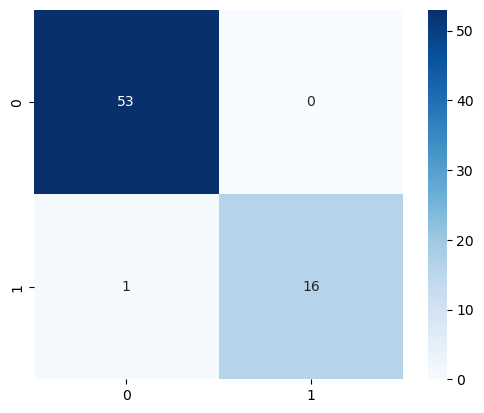

In [321]:
plt.figure()
sns.heatmap(cm_xgb, cmap= 'Blues', square= True, annot = True)

<h3>Imputed Data

In [334]:
xgb_classifier.fit(X_imp_train, y_imp_train)

y_pred = xgb_classifier.predict(X_imp_test)

acc_xgb_imp = accuracy_score(y_imp_test, y_pred)

print(acc_xgb_imp)

cm_xgb_imp = confusion_matrix(y_imp_test, y_pred)

0.9857142857142858


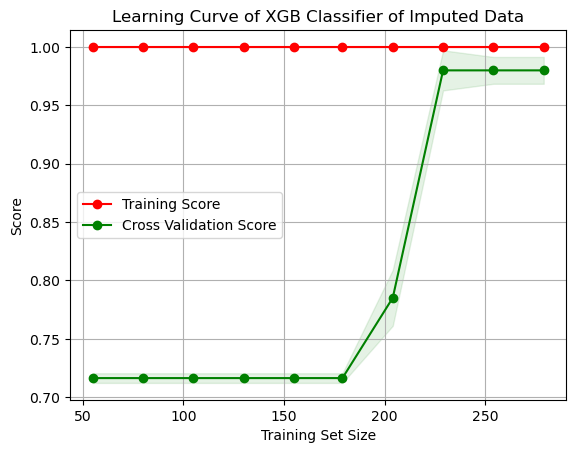

In [386]:
train_sizes = np.linspace(0.2, 1.0, 10)

train_sizes_abs, train_scores, test_scores = learning_curve(xgb_classifier, X_imp, y_imp, train_sizes=train_sizes, cv=5, random_state= 42)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis = 1)
test_scores_mean = np.mean(test_scores, axis = 1)
test_scores_std = np.std(test_scores, axis = 1)

plt.figure()
plt.title('Learning Curve of XGB Classifier of Imputed Data')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.grid()
plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha = 0.1, color = 'r')
plt.fill_between(train_sizes_abs, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha = 0.1, color = 'g')
plt.plot(train_sizes_abs, train_scores_mean, '-o', color = 'r', label = 'Training Score')
plt.plot(train_sizes_abs, test_scores_mean, '-o', color = 'g', label = 'Cross Validation Score')
plt.legend(loc = 'best')
plt.show()

<Axes: >

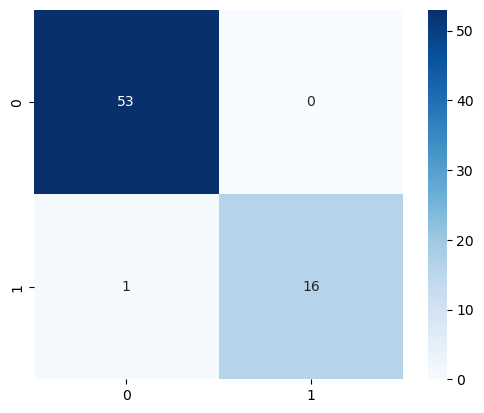

In [335]:
plt.figure()
sns.heatmap(cm_xgb_imp, cmap='Blues', annot= True, square= True)

<h2>Random Forests

<h3>Unimputed Data

In [327]:
from sklearn.ensemble import RandomForestClassifier

In [345]:
rf = RandomForestClassifier(random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred)

print(acc_rf)

cm_rf = confusion_matrix(y_test, y_pred)

1.0


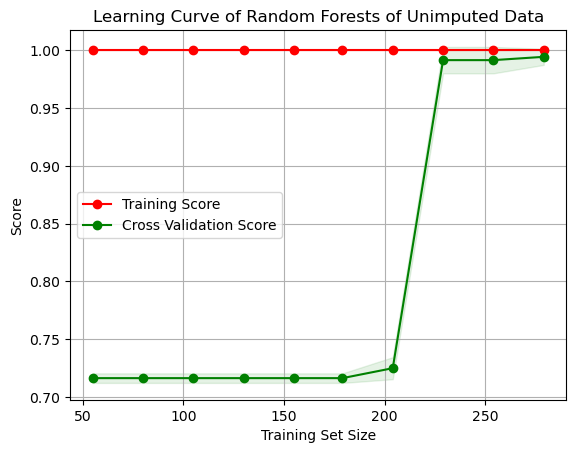

In [388]:
train_sizes = np.linspace(0.2, 1.0, 10)

train_sizes_abs, train_scores, test_scores = learning_curve(rf, X, y, train_sizes=train_sizes, cv=5, random_state= 42)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis = 1)
test_scores_mean = np.mean(test_scores, axis = 1)
test_scores_std = np.std(test_scores, axis = 1)

plt.figure()
plt.title('Learning Curve of Random Forests of Unimputed Data')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.grid()
plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha = 0.1, color = 'r')
plt.fill_between(train_sizes_abs, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha = 0.1, color = 'g')
plt.plot(train_sizes_abs, train_scores_mean, '-o', color = 'r', label = 'Training Score')
plt.plot(train_sizes_abs, test_scores_mean, '-o', color = 'g', label = 'Cross Validation Score')
plt.legend(loc = 'best')
plt.show()

<Axes: >

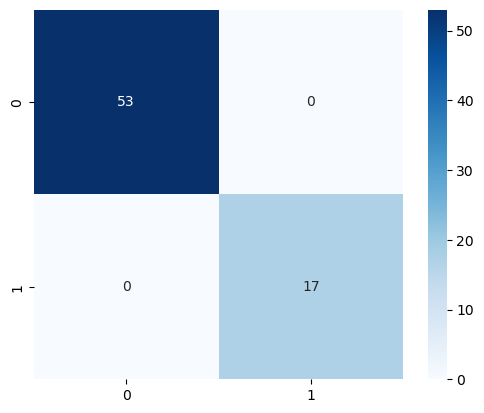

In [346]:
plt.figure()
sns.heatmap(cm_rf, cmap= 'Blues', annot = True, square = True)

<h3>Imputed Data

In [349]:
rf.fit(X_imp_train, y_imp_train)

y_pred = rf.predict(X_imp_test)

acc_imp_rf = accuracy_score(y_imp_test, y_pred)

print(acc_imp_rf)

cm_imp_rf = confusion_matrix(y_imp_test, y_imp_pred)

1.0


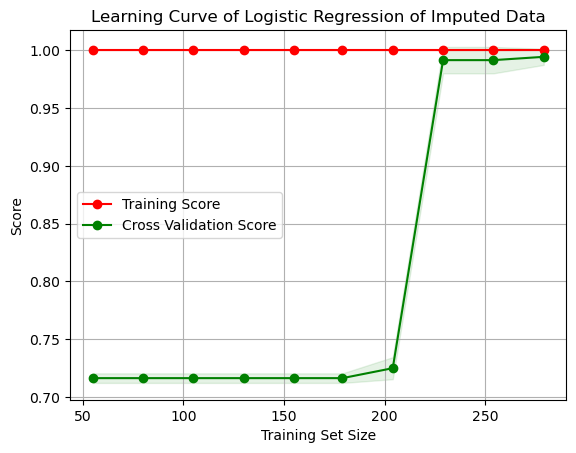

In [389]:
train_sizes = np.linspace(0.2, 1.0, 10)

train_sizes_abs, train_scores, test_scores = learning_curve(rf, X_imp, y_imp, train_sizes=train_sizes, cv=5, random_state= 42)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis = 1)
test_scores_mean = np.mean(test_scores, axis = 1)
test_scores_std = np.std(test_scores, axis = 1)

plt.figure()
plt.title('Learning Curve of Logistic Regression of Imputed Data')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.grid()
plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha = 0.1, color = 'r')
plt.fill_between(train_sizes_abs, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha = 0.1, color = 'g')
plt.plot(train_sizes_abs, train_scores_mean, '-o', color = 'r', label = 'Training Score')
plt.plot(train_sizes_abs, test_scores_mean, '-o', color = 'g', label = 'Cross Validation Score')
plt.legend(loc = 'best')
plt.show()

<Axes: >

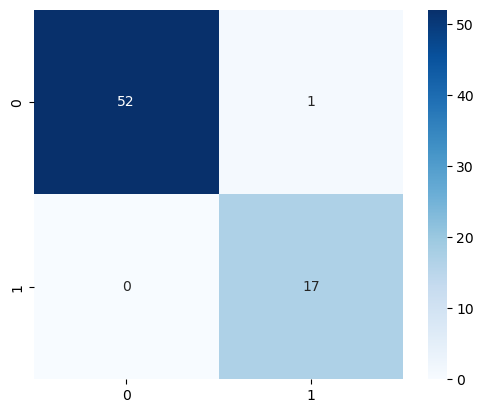

In [350]:
plt.figure()
sns.heatmap(cm_imp_rf, cmap='Blues', square= True, annot= True)